# Analyse en composantes principales (PCA) : prépositions d’inclusion en français 🇫🇷

[Xiaoou WANG](https://scholar.google.fr/citations?user=vKAMMpwAAAAJ&hl=en)

## Question

Gréa (2017) compare 5 prépositions qui dénotent l'inclusion en français :

* parmi
* au centre de
* au milieu de 
* au coeur de 
* au sein de 

Quel est donc le profil sémantique de chaque préposition ? Plus concrètement, avec quel type d'entités tendent à apparaître ces prépositions ?

## Métrique

Gréa utilise une mesure d'association appelée calcul des spécificités basées sur une distribution hypergéométrique.

En gros plus la valeur est grande, plus des éléments sont proches. Il a appliqué cette mesure sur le corpus FrWac. Pour plus de détails, allez sur le lien ci-dessous.

https://www.degruyter.com/document/doi/10.1515/cog-2015-0127/html


In [6]:
load("TaLC2020.RData")
head(inclusion)

,centre,coeur,milieu,parmi,sein
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
entreprise,-281.14,-651.39,-545.23,-1685.26,4226.02
équipe,-274.36,-913.40,-432.42,-1129.20,3829.95
groupe,-218.55,-932.95,-269.59,-1071.62,3490.06
établissement,-128.13,-367.62,-236.78,-677.87,1913.47
association,-114.08,-330.25,-172.95,-498.83,1522.44
service,-103.45,-279.61,-181.29,-495.38,1443.34


## PCA 

### Combien de dimensions

De toute évidence, les trois premières dimensions suffisent pour représenter les variables.

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,2.01600615,40.320123,40.32012
Dim.2,1.37077930,27.415586,67.73571
Dim.3,1.03937641,20.787528,88.52324
Dim.4,0.50713099,10.142620,98.66586
Dim.5,0.06670716,1.334143,100.00000


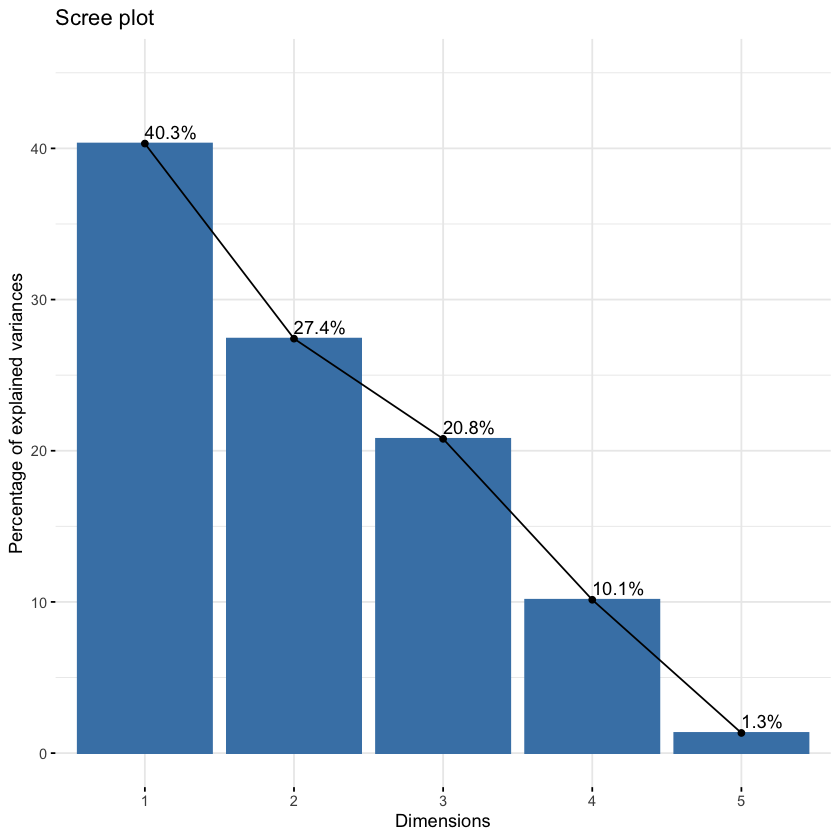

In [13]:
library(FactoMineR)
library("factoextra")
mca.object <- PCA(inclusion, graph=FALSE)
eig.val <- get_eigenvalue(mca.object)
eig.val
fviz_screeplot(mca.object, addlabels = TRUE, ylim = c(0, 45))
pca.object <- PCA(inclusion, graph=F)

### Graphe des variables

Grâce au graphe des variables, vous pouvez voir se dessiner 3 profils :

* au sein de (en haut à gauche)
* au centre de et au coeur de (en haut à droite)
* au milieu de et parmi (en bas à droite)

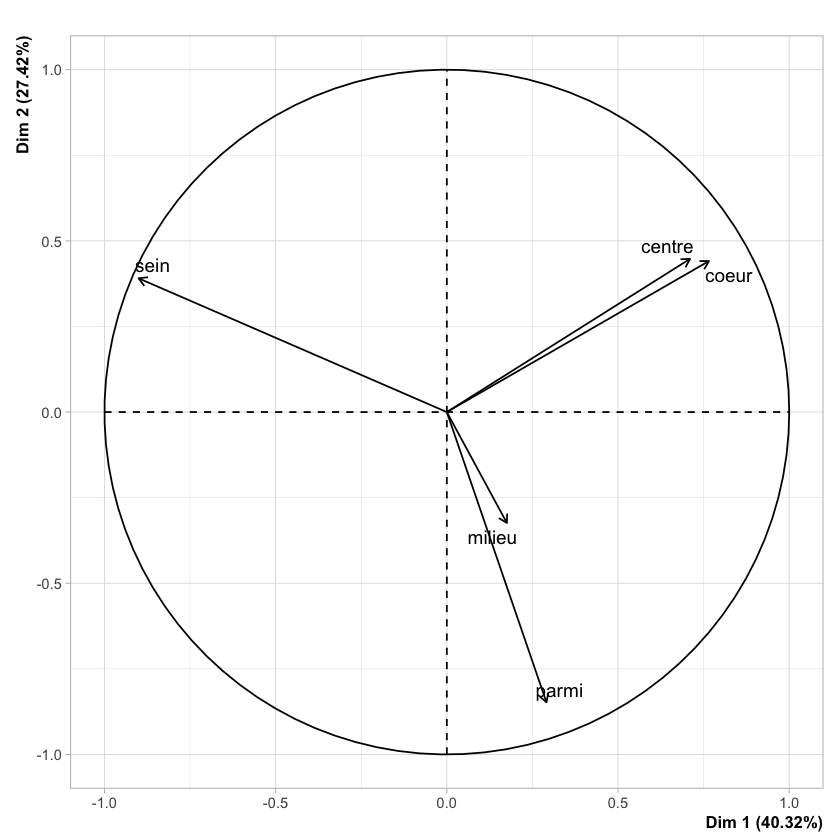

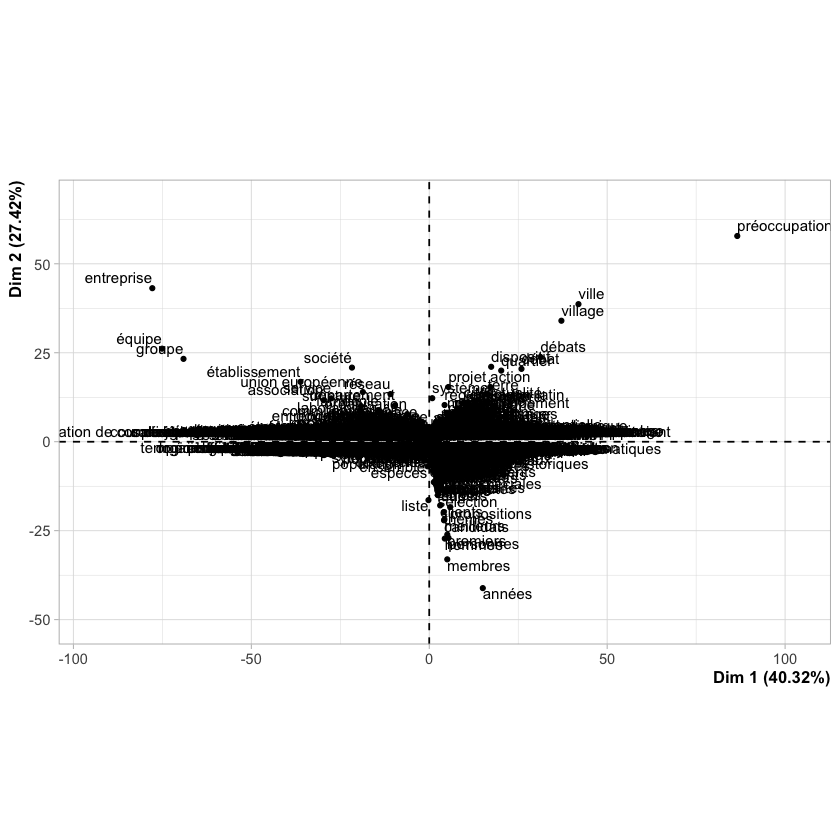

In [15]:
 # graph of variables
 plot.PCA(pca.object, choix="var", title="")
 # graph of individuals
 plot.PCA(pca.object, cex=0.8, autoLab="auto", shadowtext = FALSE, title="")

### Graphe des individus

Cependant, le graphe des individus est à peine lisible car il y a trop d'items. De ce fait nous devons filtrer les items peu utiles aux 3 profils mentionnés plus haut.

En mettant `select="coord 20"` comme option, seuls les 20 items aux valeurs les plus extrêmes sont affichés.

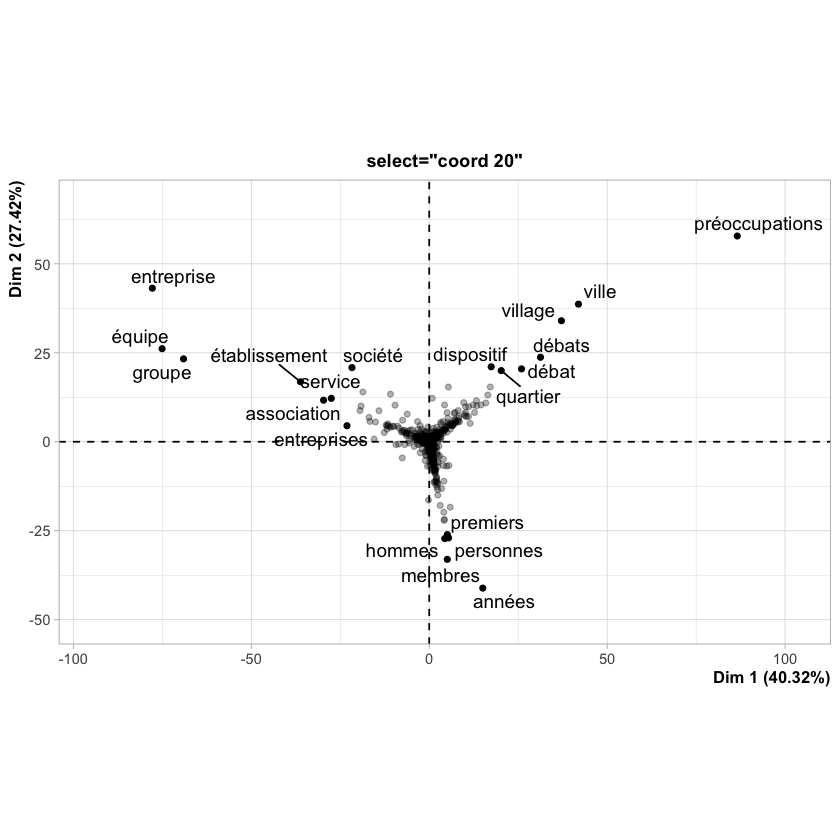

In [16]:
plot.PCA(pca.object, select="coord 20", title="select=\"coord 20\"")

## Remarques et Conclusions

En combinant les informations provenant des variables et des individus, nous pouvons voir que :

* `au sein de ` tend à apparaître avec des noms collectifs dénotant des organisations constituées d'humains

* `au centre de et au coeur de` tend à apparaître avec des noms dénotant des zones urbaines (ville, village, quartier) ainsi que des idées et pensées (préoccupations, débat).

* Enfin, `au milieu de et parmi` tend à apparaître avec des noms dénotant des groupes d'individus (hommes, personnes, members).

Cependant, la distinction entre les types d'une même catégorie rest peu apparente. `Au centre du conflit` désigne par exemple un humain qui est soit l'enquêteur soit la partie directement concernée d'un conflit, alors que `au coeur du conflit` dénote plutôt quelque chose de temporel ou de spatial comme `au pic du conflit`/`en plein conflit`.

## Références principales

Gréa, Philippe. 2017. “Inside in French.” Cognitive Linguistics 28 (1): 77–130.

Cours de Guillaume Desagulier intitulé linguistique outillée et traitements statistiques :
https://corpling.modyco.fr/workshops/M2TAL/4.multivariate.html

Guillaume Desagulier. Multivariate Exploratory Approaches. 2020. ffhalshs-01926339v3ff

Paquot, M., & Gries, S. (2020). The practical handbook of corpus linguistics.